# Регрессия с базисными функциями

С помощью линейной модели можно описывать не только линейные функции, но и любые функции, представимые в виде линейной комбинации базисных функций $f_b = \{f_i(x)\}$.

$$
y(x) = \sum_{i=1}^d \theta_i f_i(x_i).
$$

Например, полиномиальная регрессия (многочлен) степени $d$ задается следующими базисными функциями:

$$
f_b = \{ 1, x, x^2, x^3, ..., x^d \}
$$

Построим облако точек для зашумленного кубического полинома:

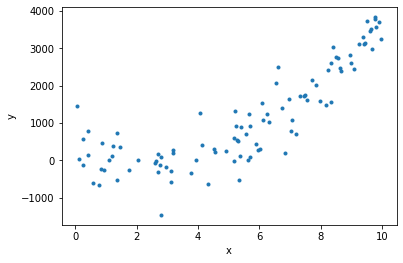

In [ ]:
# код построения и вывод графика
from matplotlib import pyplot as plt
import numpy as np  

real_a = 4
real_b = -2
real_c = -1
real_d = 1

X = 10*np.random.rand(100,1)
y = real_a*X*X*X + real_b*X*X + real_c*X + real_d + np.random.randn(100,1)*500

plt.plot(X,y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Построим аппроксимацию по 10 точкам - линейную, полиномом 2-ой, 3-ой, 8-ой степени. 

In [ ]:
# построение и обучение моделей с помощью нормального уравнения + вывод графиков

#найдем вектор theta
X_b = np.c_[np.ones((100, 1)), X, X*X, X*X*X, X*X*X*X, X*X*X*X*X] #
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #
print(theta_best)

[[ 5.88995643e+02]
 [-8.72577951e+02]
 [ 3.33133323e+02]
 [-5.31183648e+01]
 [ 4.77422855e+00]
 [-1.60611065e-01]]


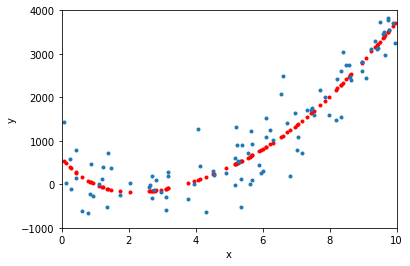

In [ ]:
y_pred = X_b.dot( theta_best )

plt.plot(X, y_pred, "r.")
plt.plot(X, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 10, -1000, 4000])
plt.show()

Исследуем полученные коэф у полинома, который переобучился

In [ ]:
# вывод коэфов, они должны получится большие (значительно больше чем соотвествующие у коэфов исходного полинома при тех же самых членах)

Введем регуляризацию - добавим дополнительное слагаемое в функцию ошибки 

что нужно сказать:
- зачем мы это делаем (хотим коэф полинома сделать меньше)
- как выглядит новая функция ошибки
- как выглядит НУ с новой функцией ошибки
- как называется такая регуляризация

In [ ]:
# обучаем модель, которая ранее переобучилась с регуляр и без

Строим байесовский вывод регуляризации

Несколько слов про другие известные способы регуляризации, зачем они нужны каждый конкретно + пример кода из scipy.

# Логистическая регрессия

Перед тем, как перейдем к логистической регрессии, давайте рассмотрим одну очень важную тему. Большинство задач машинного обучения с учителем можно условно разделить на задачи регрессии, где целевая функция непрерывна, и задачи классификации, где целевая функция представляет собой выбор из нескольких классов; их может быть много (как например, в распознавании лиц, которое так хорошо делает Facebook), но они все-таки дискретны, и каждому из них должна соответствовать целая область в пространстве параметров. Выше мы выяснили, что для задачи регрессии хорошей функцией ошибки
является сумма квадратов отклонений предсказанных ответов от правильных. Эта
функция соответствует нормально распределенному шуму, что для непрерывных
величин более чем логично. Как выбрать функцию ошибки для задачи классификации? На первый взгляд кажется, что это совсем просто: если нам нужно отделить
фотографии кошек от фотографий собак, давайте подсчитаем, сколько раз мы верно определили класс, а сколько раз неверно. То есть введем функцию ошибки, равную числу (или доле, что то же самое) верных ответов.

Такая метрика, которую называют точностью (accuracy) классификации, действительно часто представляет собой нашу конечную цель. Но вот беда: функция
ошибки, которая просто подсчитывает число верных ответов, — это кусочно-постоянная функция. Она всегда локально постоянна, и маленькие изменения в классификаторе практически никогда не приведут к изменению ответа на каких-то тестовых примерах. Есть только некий конечный набор разделяющих поверхностей (множество меры нуль, как сказал бы математик), на которых значение функции внезапно и резко меняется.

И совершенно непонятно, как оптимизировать такую функцию. Градиентный спуск, который станет нашим основным инструментом для обучения нейронных сетей, здесь бесполезен, потому что производная функции равна нулю везде, кроме тех редких случаев, когда она и вовсе не существует.

Как же правильно выразить тот факт, что наши предсказания более или менее похожи на имеющиеся тренировочные данные, да еще и сделать это гладкой функцией. которую можно будет потом оптимизировать?

# Какое же решение

Из теории информации в информатику пришло понятие *относительной энтропии*, или *расстояния Кульбака — Лейблера* (Kullback-Leibler divergence, KL divergence,relative entropy), названного так в честь Соломона Кульбака и Ричарда Лейблера. Расстояние Кульбака-Лейблера является по своей сути мерой разницы между двумя вероятностными распределениями *P* и *Q*. Как правило, считается, что распределение *P* — это «истинное» распределение, а *Q* — его приближение, и тогда расстояние Кульбака-Лейблера служит оценкой качества приближения. В теории информации оно является как раз количеством информации, которая теряется при приближении распределения *P* с помощью распределения *Q*.

Говоря формально, расстояние Кульбака — Лейблера от распределения *P* до распределения *Q* обозначается как KL(P||Q) и определяется следующим образом:


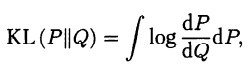

где интеграл берется по всему пространству исходов, которое у *P* и *Q* должно быть общее. Нас, конечно, больше всего интересует два частных случая:

> Когда *P* и *Q* - дискретные случайные величины на дискретном множестве X={X1,...,Xn}, расстояние Кульбака-Лейблера выглядит так:



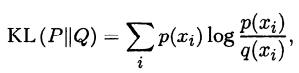

где p(xᵢ) и q(xᵢ) - собственно вероятности исхода xᵢ

> Когда P и Q - непрерывные случайные величины в пространстве 𝐑ᵈ, расстояние Кульбака-Лейблера можно записать как


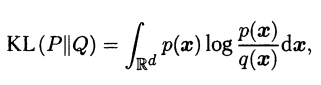

где p и q - плотности распределений *P* и *Q*
Как использовать расстояние Кульбака-Лейблера для задач классификации Неформально говоря, мы будем пытаться подсчитать, насколько распределение на тестовых примерах, порожденное классификатором (назовем его q), похоже или непохоже на «истинное» распределение, задаваемое данными (назовем его p). А формально давайте начнем с бинарной классификации, где входные данные име-
ют вид (x,y) и y принимает только два значения; назовем их 0 и 1. Введем распределение данных достаточно тривиальным образом: р(у = 1) = у, а р(у = 0) =1-у; это значит, что в распределении данных все значения будут равны или 0, или 1. А распределение классификатора будет уж какое получится; классификатор пытается оценить вероятность положительного ответа р(у | D, x), и именно ее мы
и будем считать вероятностью q(у).

Минимизировать будем не совсем расстояние Кульбака-Лейблера, а так называемую *перекрестную энтропию* (cross-entropy):

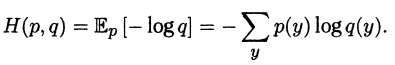

Для бинарной классификации целевая функция, которую мы будем минимизировать на наборе данных D = {(xᵢ,yᵢ)}ᴺ‚ обычно выглядит как средняя перекрестная энтропия по всем точкам в данных:

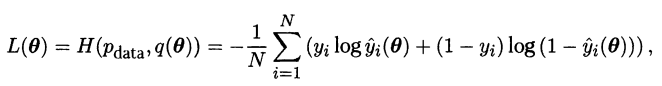

где 
$ \ \hat yᵢ(ϴ) $ - оценка вероятности ответа 1, полученная классификатором

###Причем же тут логистическая регрессия?
А при том, что именно с этой функцией ошибки тесно связана и классическая линейная модель классификации, которая называется логистической регрессией. Именно она обычно размещается на последнем уровне даже самых глубоких нейронных сетей: когда все признаки выделены, нужно в итоге на них все-таки сделать какой-то классификатор, и логистическая регрессия здесь подходит лучше всего. Поэтому для нас есть смысл изучить ее чуть подробнее.

Давайте рассматривать задачу классификации с вероятностной точки зрения:
сопоставим каждому классу $𝐶ₖ$ плотность р(х | $𝐶ₖ$) (ее мы, конечно, заранее не знаем), определим некие априорные распределения р($𝐶ₖ$) (это по сути всего лишь размеры классов — насколько вероятно, что пример — из класса $𝐶ₖ$, если мы еще не знаем ничего о самом примере), а затем будем искать р(х | $𝐶ₖ$) по теореме Байеса. Для двух классов получится:

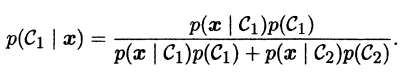

Перепишем это равенство немного по-другому:


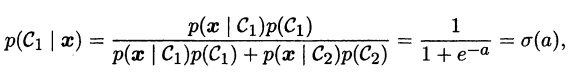

где


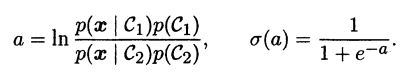

Функция $σ(a)$ - называется логистическим сигмоидом.

Но перейдем к самой задачи классификации. Логистическая регрессия - это модель, в которой мы напрямую делаем предположение о том, как выглядит аргумент сигмоида a.

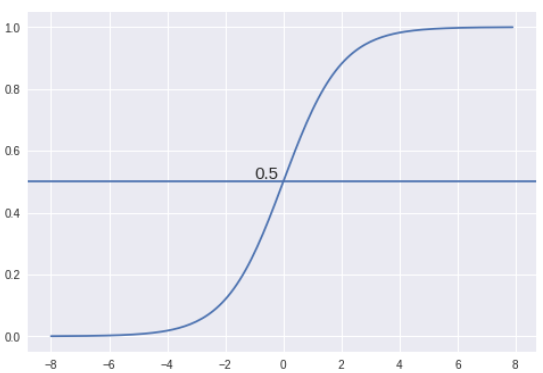

А именно, будем представлять а как линейную функцию от входных признаков:
a=$wᵀ*x$. Дело в том, что сигмоид переводит любое вещественное число на отрезок [0, 1]; чем меньше аргумент, тем меньше результат (на минус бесконечности получается 0), и наоборот, на плюс бесконечности получается 1. Так что представлять сам ответ (номер класса, 0 или 1) в виде линейной функции было бы, понятное дело, довольно глупой идеей, но моделировать а линейной функцией уже вполне осмысленно, и даже, как видите, вполне логично интерпретировать результат как апостериорную вероятность того или иного класса.

В итоге получается, что 

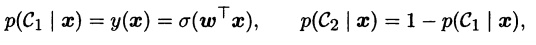

И в этом случае, для обучения мы можем напрямую оптимизировать правдоподобие по $w$

Для входного набора данных {xₙ,tₙ}, где xₙ-входы, а tₙ-соответсвующие им правильные ответы, tₙ$∈${0,1}, мы получим такое правдоподобие:


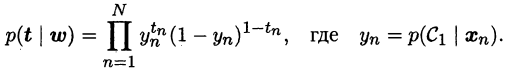

И теперь можно искать параметры максимального правдоподобия, максимизируя $ln p(t|$$w)$, то есть минимизируя следующую функцию:



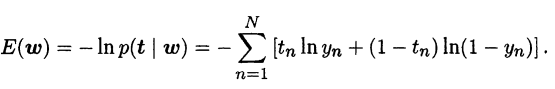

Это стандартная функция ошибки для задач классификации. Она также тривиальным образом обобщается на несколько классов: вместо логистического сигмоида будем теперь рассматривать так называемую softmax-функцию (сглаженный максимум, то есть на самом деле просто нормализованную экспоненту).
Для *K* классов получается:

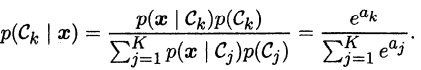

Давайте закодируем поступающие на вход правильные ответы в виде векторов длины *К*, в каждом из которых все компоненты равны нулю, кроме правильного класса, где стоит единица (это называется one-hot кодированием, и мы с ним не раз еще встретимся). Тогда для таких векторов Т = {tₙ} правдоподобие выглядит так:

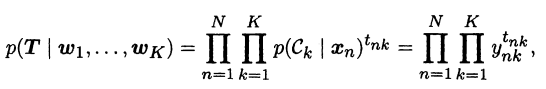

где $y_{nk}=y_k(x_n)$.

Понимать, как математически устроено представление задач классификации, крайне важно: большинство. практических задач — это именно задачи классификации, и целевая функция в таком виде, как показано выше, будет постоянно встречаться как в этой книге, так и в вашей практике анализа данных. Однако здесь мы не будем вдаваться в подробности обучения логистической регрессии. Все равно она для нас больше интересна как часть большой нейронной сети, верхний слой, так что и обучать ее мы будем вместе со всей остальной сетью с помощью одного
из универсальных алгоритмов обучения. В наше время практически все эти алгоритмы представляют собой по сути модификации градиентного спуска.`

#Давайте рассмотрим пример

Пример связан с проблемой двоичной классификации по одной переменной. Это наиболее простой вид классификационной задачи. При подготовке моделей классификации вы должны предпринять несколько общих шагов:


*   Импорт пакетов, функций и классов.
*   Получение данных для работы и, при необходимости, их трансформация.
*   Создание классификационной модели и её обучение (или приспособление) к существующим данным.
*   Оценка своей модели, чтобы убедиться, что её точность удовлетворительна.

Достаточно хорошая модель, которую вы определяете, может использоваться для дальнейших прогнозов, связанных с новыми, невидимыми данными. Вышеупомянутая процедура одинакова для классификации и регрессии.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Создадим массивы для входных (x) и выходных (y) значений:

In [ ]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Массив $x$ должен быть двумерным. В нем должен быть один столбец для каждого входа, а количество строк должно быть равно количеству наблюдений. Чтобы сделать $x$ двумерным, вы применяете .reshape() с аргументами -1, чтобы получить столько строк, сколько необходимо, и 1, чтобы получить один столбец.

In [ ]:
x,y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]), array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

$x$ имеет два измерения:

*   Один столбец для одного входа.
*   Десять строк, каждая из которых соответствует одному наблюдению.

$y$ — одномерный с десятью элементами. Опять же, каждый пункт соответствует одному наблюдению. Он содержит только нули и единицы, так как это двоичнfz классификациz.

После того, как вы подготовили вход и выход, вы можете создать и определить свою модель классификации. Вы собираетесь представить его с помощью экземпляра класса LogisticRegression:


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

Приведенный выше оператор создает экземпляр LogisticRegression и связывает его ссылки с моделью переменных. LogisticRegression имеет несколько дополнительных параметров, которые определяют поведение модели и подход:

После того, как модель создана, ее нужно подогнать (или обучить). Подгонка модели — это процесс определения коэффициентов $b_0, b_1,...,b_r$ которые соответствуют наилучшему значению функции стоимости. Вы подходите к модели с помощью .fit():

In [ ]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

На этом этапе у нас определена модель классификации

Оценим модель:
Как только модель определена, вы можете проверить ее точность с помощью .predict_proba(), который возвращает матрицу вероятностей того, что прогнозируемый результат равен нулю или единице:

In [ ]:
 model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

Мы можем получить фактические прогнозы на основе матрицы вероятностей и значений $p(x)$ с помощью .predict():

In [ ]:
 model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Эта функция возвращает предсказанные выходные значения в виде одномерного массива.
На рисунке ниже показаны результаты входа, выхода и классификации:


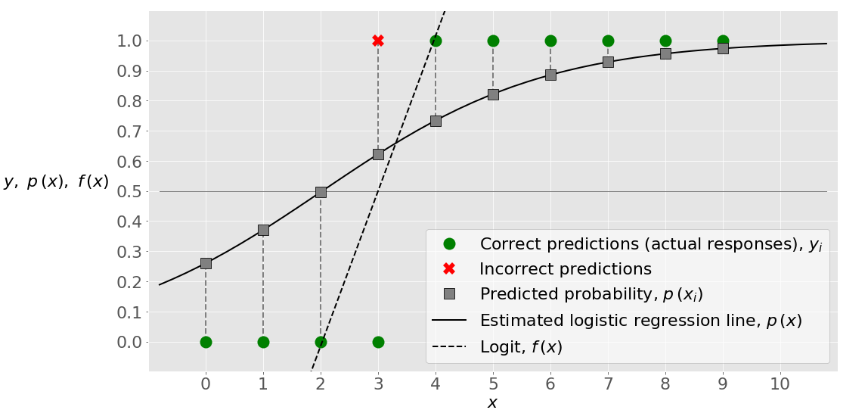

###Улучшение модели
Мы можем улучшить свою модель, задав разные параметры. Например, давайте работать с силой регуляризации C, равной 10,0, вместо значения по умолчанию 1,0:

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

Теперь у вас есть еще одна модель с другими параметрами. Он также будет иметь другую матрицу вероятностей и другой набор коэффициентов и прогнозов:

In [ ]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [ ]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Мы видим, что модель сработала более точно

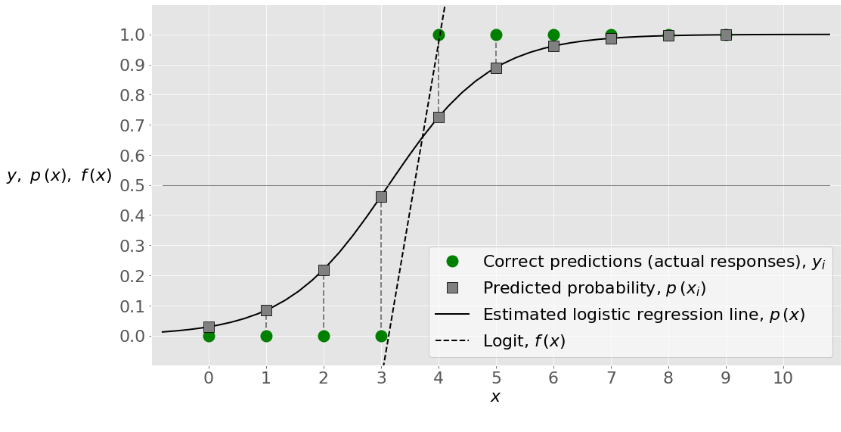

На этом рисунке показано, что оценочная линия регрессии теперь имеет другую форму и что четвертая точка правильно классифицируется как 0. Красный знак $\times$ отсутствует, поэтому нет неверного прогноза.


Решим еще одну задачу классификации. Она похожа на предыдущую, только за исключением того, что выход отличается вторым значением. Код будет аналогичен предыдущему случаю:

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [ ]:
#Изначальная
print('y:', y, sep='\n', end='\n\n')

y:
[0 1 0 0 1 1 1 1 1 1]



In [ ]:
#Предсказанная
print('y_pred:', y_pred, sep='\n', end='\n\n')

y_pred:
[0 0 0 1 1 1 1 1 1 1]



В этом случае оценка (или точность) составляет $0,8$. Есть два наблюдения, классифицированных неправильно. Один из них — ложноотрицательный, другой — ложноположительный.

На рисунке ниже показан этот пример с восемью правильными и двумя неправильными прогнозами:

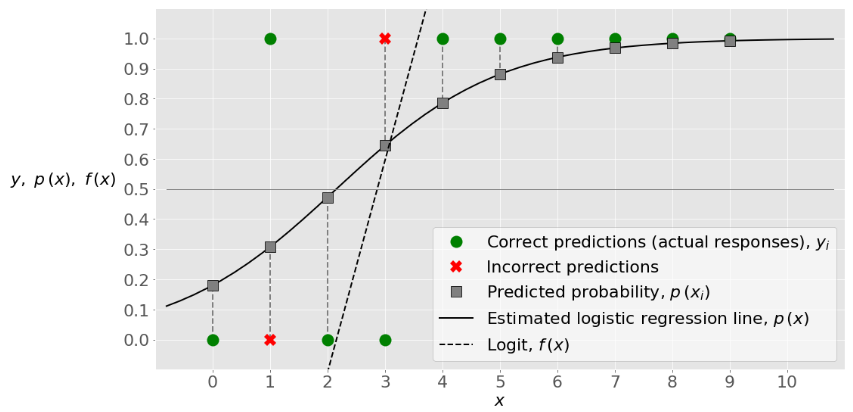

Этот рисунок раскрывает одну важную характеристику этого примера. В отличие от предыдущей, эта задача линейно не разделима. Это означает, что вы не можете найти значение и провести прямую линию, чтобы разделить наблюдения $с = 0$ и наблюдения $с = 1$. Такой строчки нет.

Имейте в виду, что логистическая регрессия — это, по сути, линейный классификатор, поэтому вы теоретически не можете создать модель логистической регрессии с точностью до 11 в этом случае.